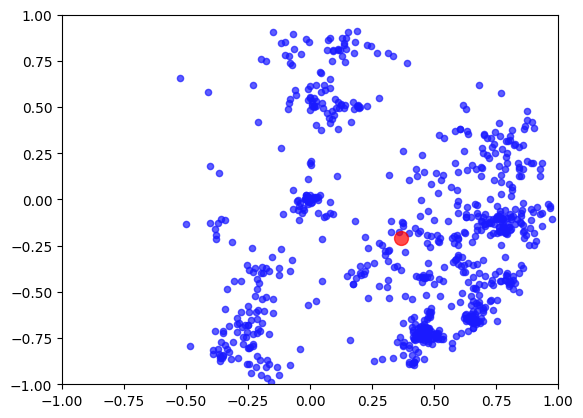

In [34]:
from shared_tools.make_datasets import x_train, y_train
import pygraphviz as pgv
from matplotlib import pyplot as plt
from typing import Iterable
import pickle, os, numpy as np
from deap import gp
from functools import partial
from run_gp import get_pset
aro, val = sum(a for a, _ in y_train) / len(y_train), sum(v for _, v in y_train) / len(y_train)

def show(a_v_pairs: list[tuple[float, float]]) -> None:
    plt.scatter([a for a, _ in a_v_pairs], [v for _, v in a_v_pairs],  s=20, color=(0.1, 0.1, 1, 0.7))
    plt.scatter([aro], [val], s=100, color=(1, 0, 0, 0.7))
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.show()
show(y_train)

In [10]:
def models(dir_path: str, prefix='') -> list[gp.PrimitiveTree]:
    path = f"{dir_path}/data"
    models= [pickle.load(open(f"{path}/{file}", 'rb')) for file in os.listdir(path) if f'{prefix}best' in file]
    return models

In [23]:
model = models('simple_pred')[0]
compile = partial(gp.compile, pset=get_pset('simple_pred'))
print(compile(model[0].format(2,3))(None))

(2, 3)


In [8]:
compile = partial(gp.compile, pset=get_pset('simple_pred'))
for model in sorted(models('simple_pred'), key=len)[:5]:
    
    #print(model[0].arity)
    break
    raise ValueError
    nodes, edges, labels = gp.graph(model)
    print([compile(model)(x) for x in x_train[:10]])
    ### Graphviz Section ###
    g = pgv.AGraph()
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)
    g.layout(prog="dot")
    
    for i in nodes:
        n = g.get_node(i)
        n.attr["label"] = labels[i]
    
    display(g)

    predictor = compile(model)
    predictions = [predictor(img) for img in x_train]
    show(predictions)


combine(std(LBP(Gau11(GauXY(Sobel_X(GauXY(Hist_Eq(Gau1(LBP(Gau11(Gau1(LBP(Gau11(Sobel_X(GauXY(GauXY(GauXY(Hist_Eq(Gau1(Gau11(Sobel_X(GauXY(GauXY(GauXY(Hist_Eq(Gau1(LBP(Gau11(Sobel_X(GauXY(GauXY(Sobel_X(GauXY(Hist_Eq(Gau1(Gau11(Region_S(Image, 85, 29, 45))))))))))))))))))))))))))))))))))))), min(Gau11(Sobel_X(GauXY(Hist_Eq(Sobel_X(GauXY(Sobel_X(GauXY(Hist_Eq(Gau1(LBP(Sobel_X(GauXY(Hist_Eq(Gau1(Gau11(Region_S(Image, 85, 29, 45)))))))))))))))))))


In [4]:
compile = partial(gp.compile, pset=get_pset('MLGP'))
for arousal_pred, val_pred in list(zip(models('MLGP', prefix='a'), models('MLGP', prefix='v')))[:5]:
    #aro_predictions = [compile(arousal_pred)(img) for img in x_train]
    #val_predictions = [compile(val_pred)(img) for img in x_train]
    #show(list(zip(aro_predictions, val_predictions)))
    pass

std(Hist_Eq(LBP(HOG(HOG(HOG(Region_S(Image, 23, 156, 29)))))))
sub(std(Sobel_Y(HOG(HOG(Gau11(HOG(HOG(Gau11(Gau11(LoG2(Region_S(Image, 154, 33, 31))))))))))), std(LBP(Region_S(Image, 123, 33, 39))))


In [37]:
def rect_region(img_region, x: int, y: int, width: int, height: int):
    width, height = img_region.shape
    x_end = min(width, x + width)
    y_end = min(height, y + height)
    return img_region[x:x_end, y:y_end]

In [30]:
from dataclasses import dataclass
from typing import Any
@dataclass
class Node:
    f: Any
    children: list[Node]

In [32]:
Node(4, [])

Node(f=4, children=[])

In [47]:
a = np.arange(100).reshape(10, 10)
rect_region(a, 0, 0, 2, 2)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [58]:
def rect_region(img_region, x: int, y: int, width: int, height: int):
    width, height = img_region.shape
    x_end = min(width, x + width)
    y_end = min(height, y + height)
    print(x_end, x, width)
    return img_region[0:2, 0:2]
rect_region(a, 0, 0, 2, 2)

10 0 10


array([[ 0,  1],
       [10, 11]])